In [1]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
from keras.datasets import mnist
from keras import layers
from keras.models import Model, load_model
from keras import optimizers
from keras import losses
from keras import callbacks
from keras import regularizers
import os.path as path
import os
import pickle
from keras import backend as K
from tqdm import tnrange
from helpers import *

Using TensorFlow backend.


In [2]:
(train_img, train_lab), (test_img, test_lab) = get_emnist('letters')

# Experimentations on transfer learning
---------------------------------------------------------------

In the last notebook we trained several networks to recognize handwritten digits from the MNIST database. We might be now tempted to ask: can we do something else with these networks? Or are they too specific to be used for other types of tasks?

## The EMNIST database
![EMNIST image samples](Figures/emnist.png)

The Enhanced Modified National Institute of Standards and Technologies (EMNIST in short) dataset is an extension of the MNIST dataset that covers both numbers and letters. It is divided in 62 unbalanced classes (26 uppercase letters, 26 lowewrcase letters, and 10 digits), with a series of subdivisions (letters only, digits only, MNIST, etc...). You can find out more about how the dataset is structured in the [original EMNIST paper.](http://arxiv.org/abs/1702.05373)

For this exercise, we will use the networks we trained in the main Notebook and replace the last layer in order to classify the 26 letters (upper and lower case alike) of the English alphabet, using the "letters" subset of EMNIST. We will start by retraining only the last softmax layer and we will then retrain also the other fully connected layers, starting from the to towards the bottom.

input_1
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten_1
dense_1
dense_2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
__________________________________________________________

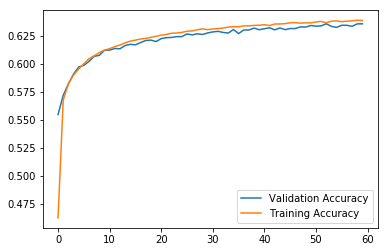

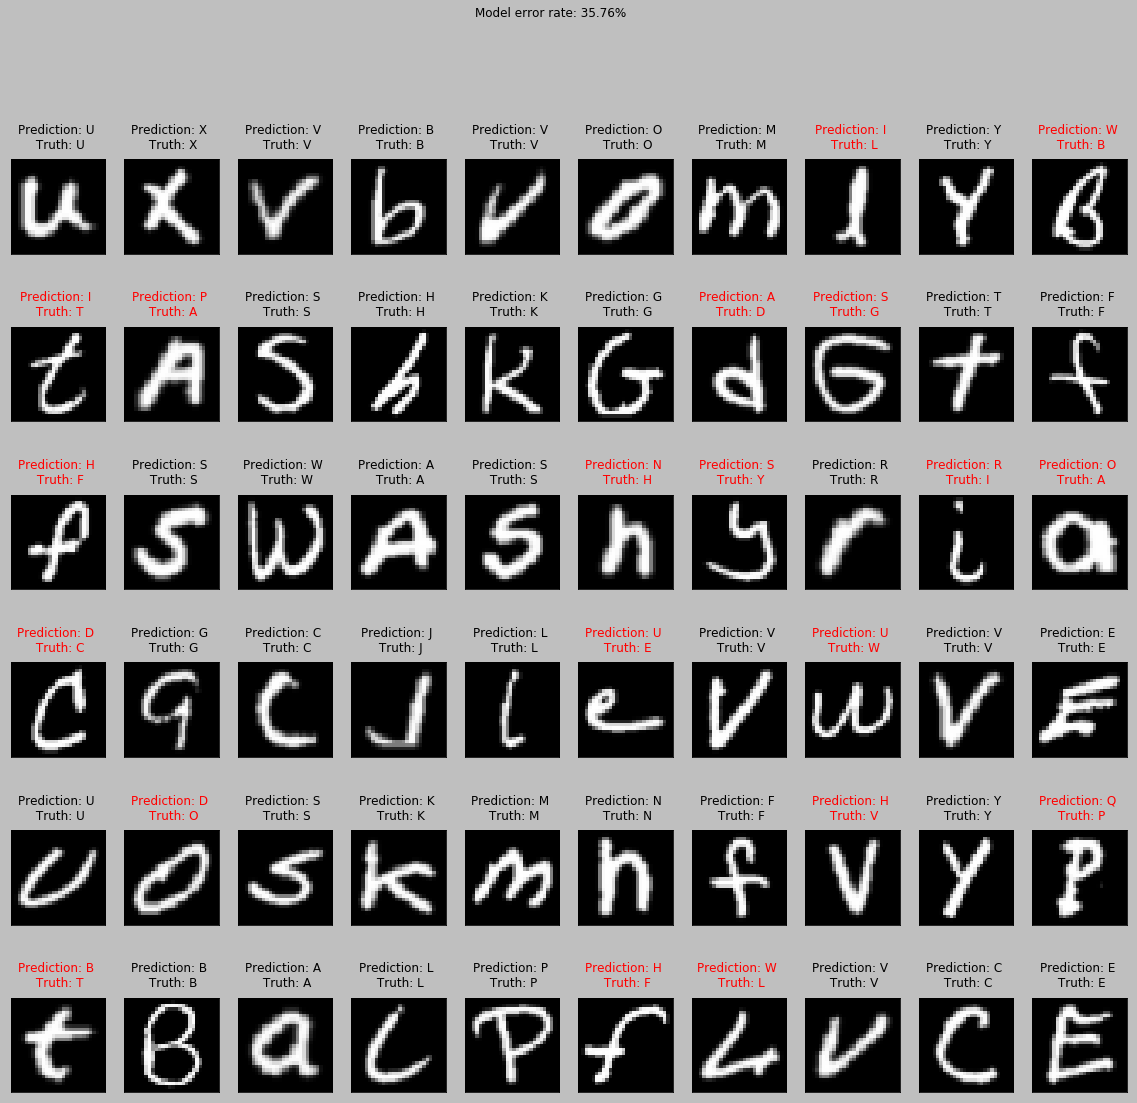

In [3]:
K.clear_session()
model = load_model(path.join('models', 'convolutional_2dense.h5'))
in_layer = model.input
out_layer = layers.Dense(26, activation="softmax", name="letter_output")(model.layers[-2].output)
for layer in model.layers[:-1]:
    print(layer.name)
    layer.trainable = False
letters_model = Model(in_layer, out_layer)
print(letters_model.summary())
opt = optimizers.SGD(lr=0.3)
letters_model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6, verbose=True)
h = letters_model.fit(
    train_img, train_lab, validation_split=0.2, epochs=60,
    batch_size=100, callbacks=[reduce_lr]
    )
plt.plot(h.epoch, h.history['val_accuracy'], h.history['accuracy'])
plt.legend(["Validation Accuracy", "Training Accuracy"], loc=4)
show_test_emnist(letters_model, (test_img, test_lab))

input_1
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten_1
dense_1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________


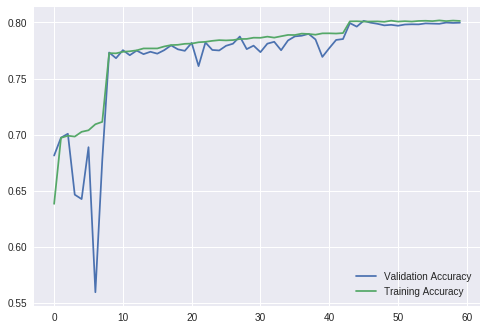

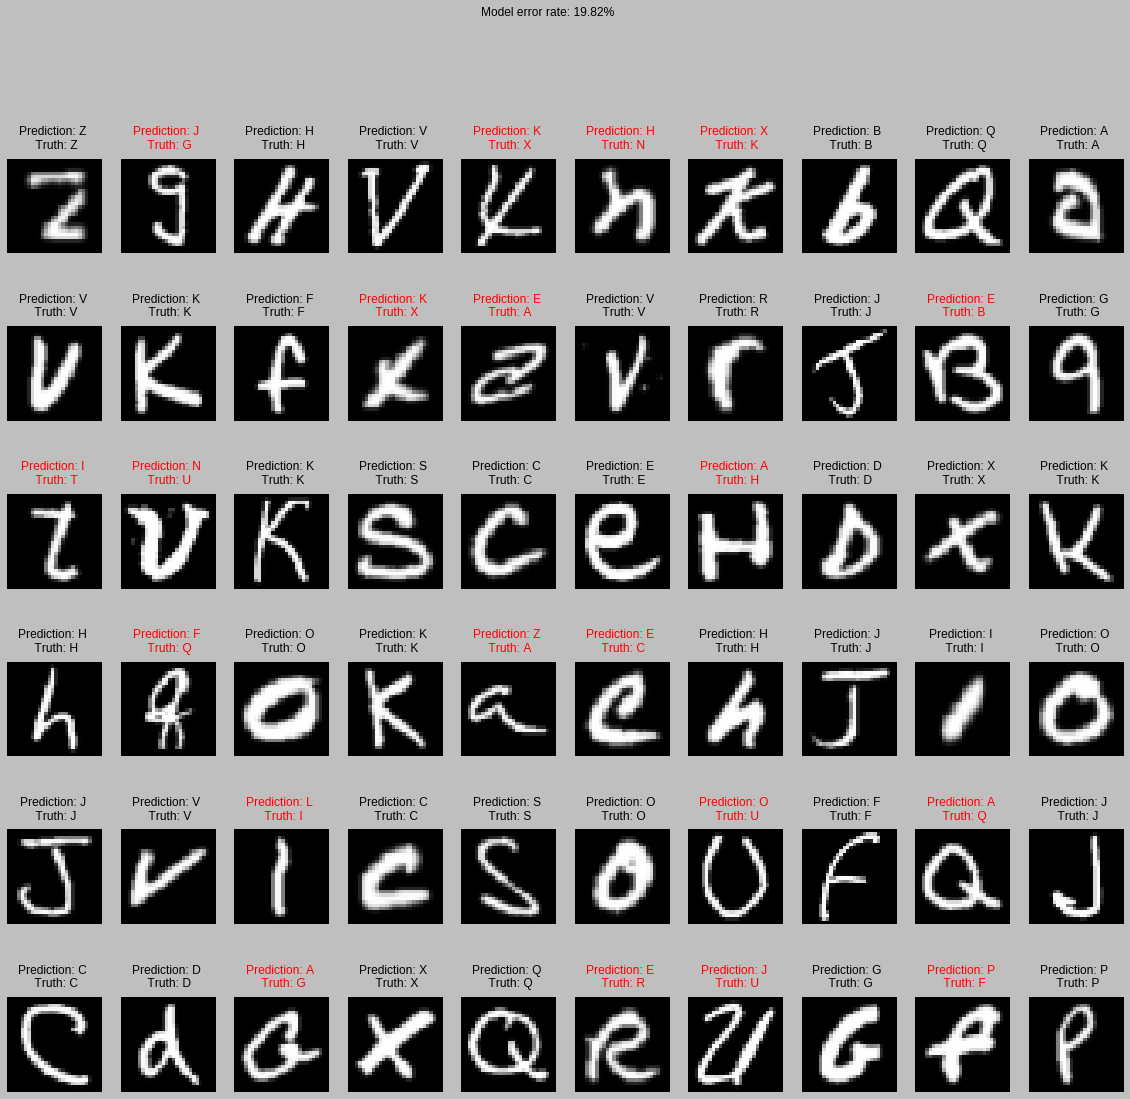

In [4]:
K.clear_session()
model = load_model(path.join('models', 'convolutional_2dense.h5'))
in_layer = model.input
out_layer = layers.Dense(26, activation="softmax", name="letter_output")(model.layers[-2].output)
for layer in model.layers[:-2]:
    print(layer.name)
    layer.trainable = False
letters_model = Model(in_layer, out_layer)
print(letters_model.summary())
opt = optimizers.SGD(lr=0.3)
letters_model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6, verbose=True)
h = letters_model.fit(
    train_img, train_lab, validation_split=0.2, epochs=60,
    batch_size=100, callbacks=[reduce_lr]
    )
plt.plot(h.epoch, h.history['val_acc'], h.history['acc'])
plt.legend(["Validation Accuracy", "Training Accuracy"], loc=4)
show_test_emnist(letters_model, (test_img, test_lab))

input_1
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten_1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_1 

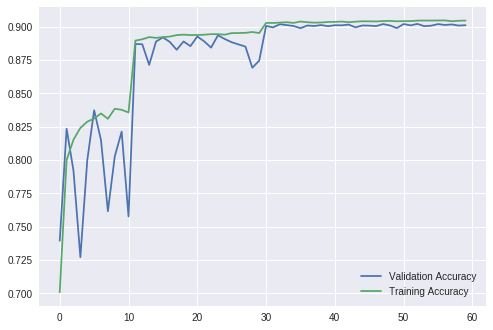

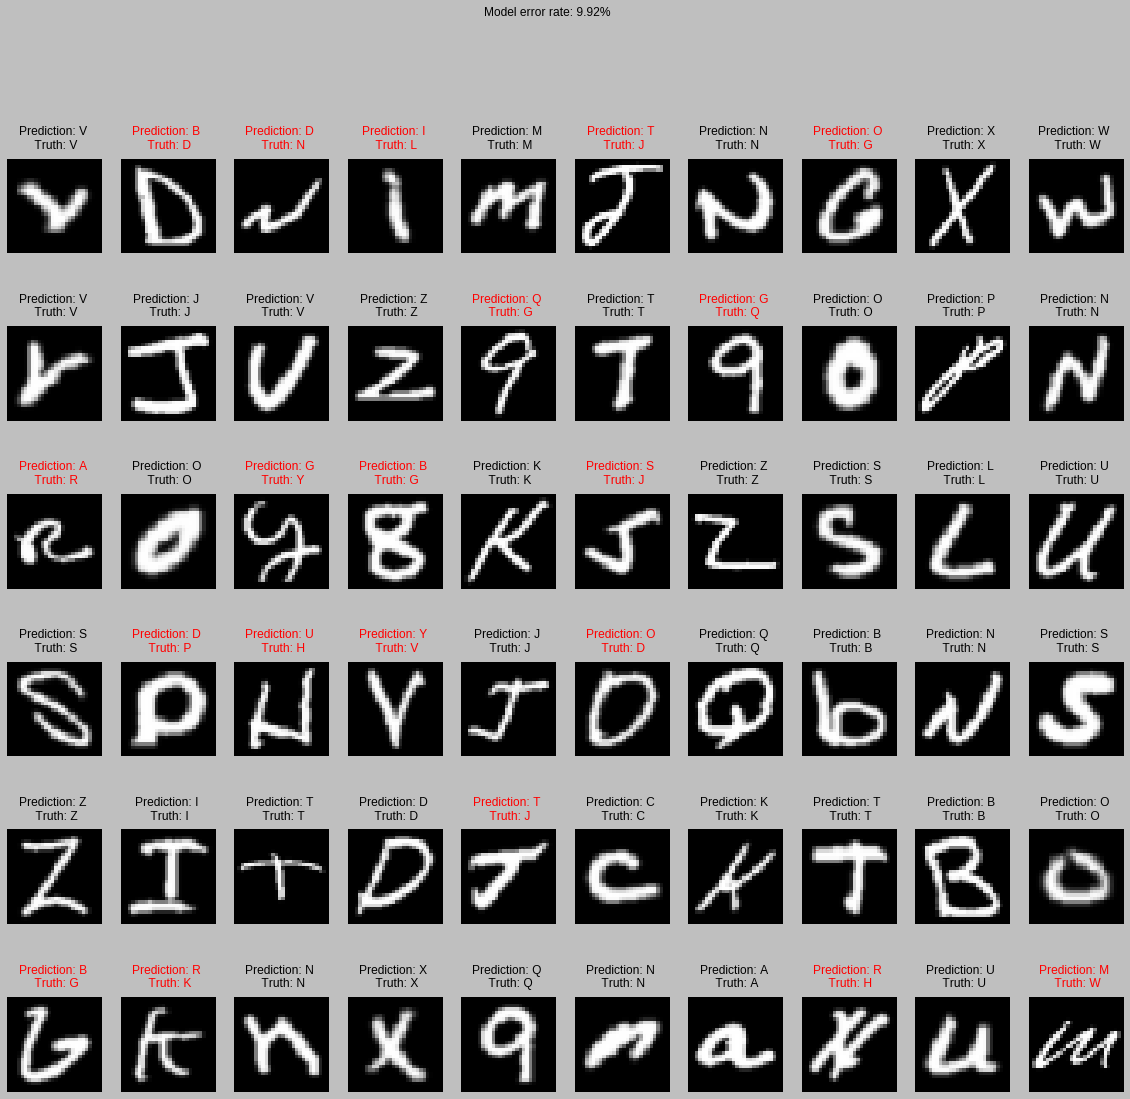

In [5]:
K.clear_session()
model = load_model(path.join('models', 'convolutional_2dense.h5'))
in_layer = model.input
out_layer = layers.Dense(26, activation="softmax", name="letter_output")(model.layers[-2].output)
for layer in model.layers[:-3]:
    print(layer.name)
    layer.trainable = False
letters_model = Model(in_layer, out_layer)
print(letters_model.summary())
opt = optimizers.SGD(lr=0.1)
letters_model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6, verbose=True)
h = letters_model.fit(
    train_img, train_lab, validation_split=0.2, epochs=60,
    batch_size=100, callbacks=[reduce_lr]
    )

plt.plot(h.epoch, h.history['val_acc'], h.history['acc'])
plt.legend(["Validation Accuracy", "Training Accuracy"], loc=4)
show_test_emnist(letters_model, (test_img, test_lab))

input_1
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten_1
dropout_1
dense_1
dropout_2
dense_2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
______________________________________

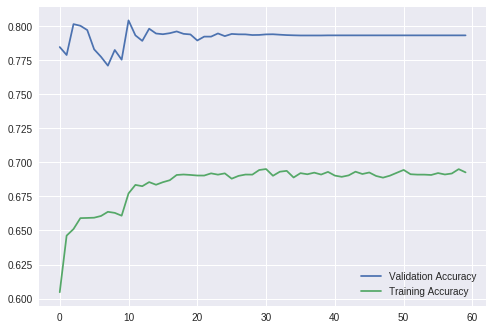

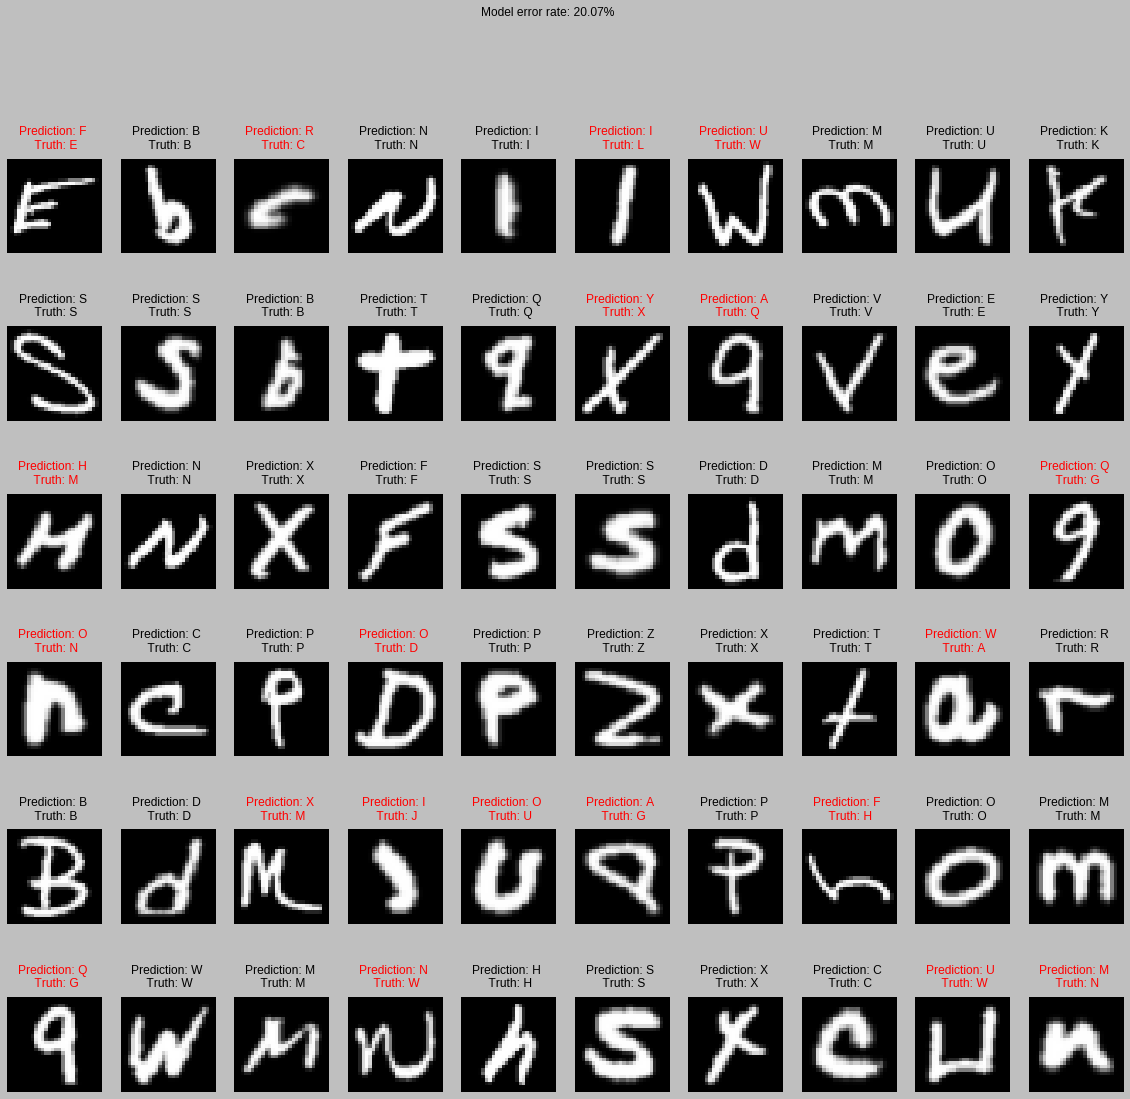

In [6]:
K.clear_session()
model = load_model(path.join('models', 'convolutional_dropout.h5'))
in_layer = model.input
out_layer = layers.Dense(26, activation="softmax", name="letter_output")(model.layers[-2].output)
for layer in model.layers[:-2]:
    print(layer.name)
    layer.trainable = False
letters_model = Model(in_layer, out_layer)
print(letters_model.summary())
opt = optimizers.SGD(lr=0.3)
letters_model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6, verbose=True)
h = letters_model.fit(
    train_img, train_lab, validation_split=0.2, epochs=60,
    batch_size=100, callbacks=[reduce_lr]
    )

plt.plot(h.epoch, h.history['val_acc'], h.history['acc'])
plt.legend(["Validation Accuracy", "Training Accuracy"], loc=4)
K.set_learning_phase(0)
show_test_emnist(letters_model, (test_img, test_lab))

input_1
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten_1
dropout_1
dense_1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
________________________________________________________

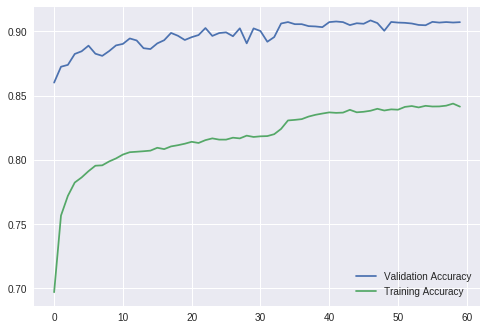

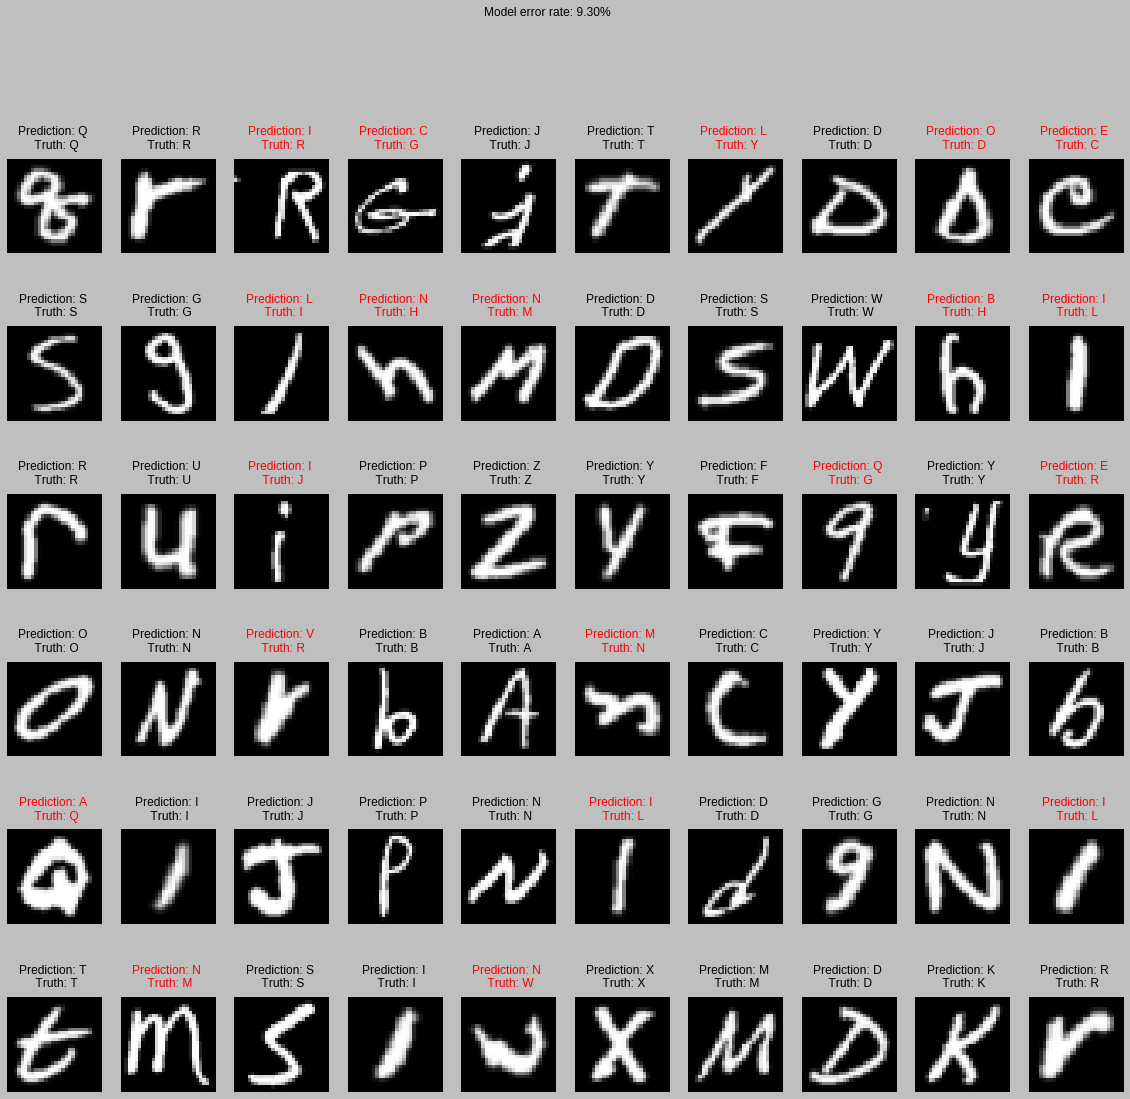

In [7]:
K.clear_session()
model = load_model(path.join('models', 'convolutional_dropout.h5'))
in_layer = model.input
out_layer = layers.Dense(26, activation="softmax", name="letter_output")(model.layers[-2].output)
for layer in model.layers[:-4]:
    print(layer.name)
    layer.trainable = False
letters_model = Model(in_layer, out_layer)
print(letters_model.summary())
opt = optimizers.SGD(lr=0.3)
letters_model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6, verbose=True)
h = letters_model.fit(
    train_img, train_lab, validation_split=0.2, epochs=60,
    batch_size=100, callbacks=[reduce_lr]
    )

plt.plot(h.epoch, h.history['val_acc'], h.history['acc'])
plt.legend(["Validation Accuracy", "Training Accuracy"], loc=4)
K.set_learning_phase(0)
show_test_emnist(letters_model, (test_img, test_lab))

input_1
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten_1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dropout_

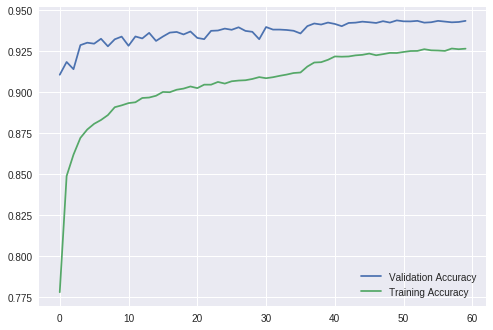

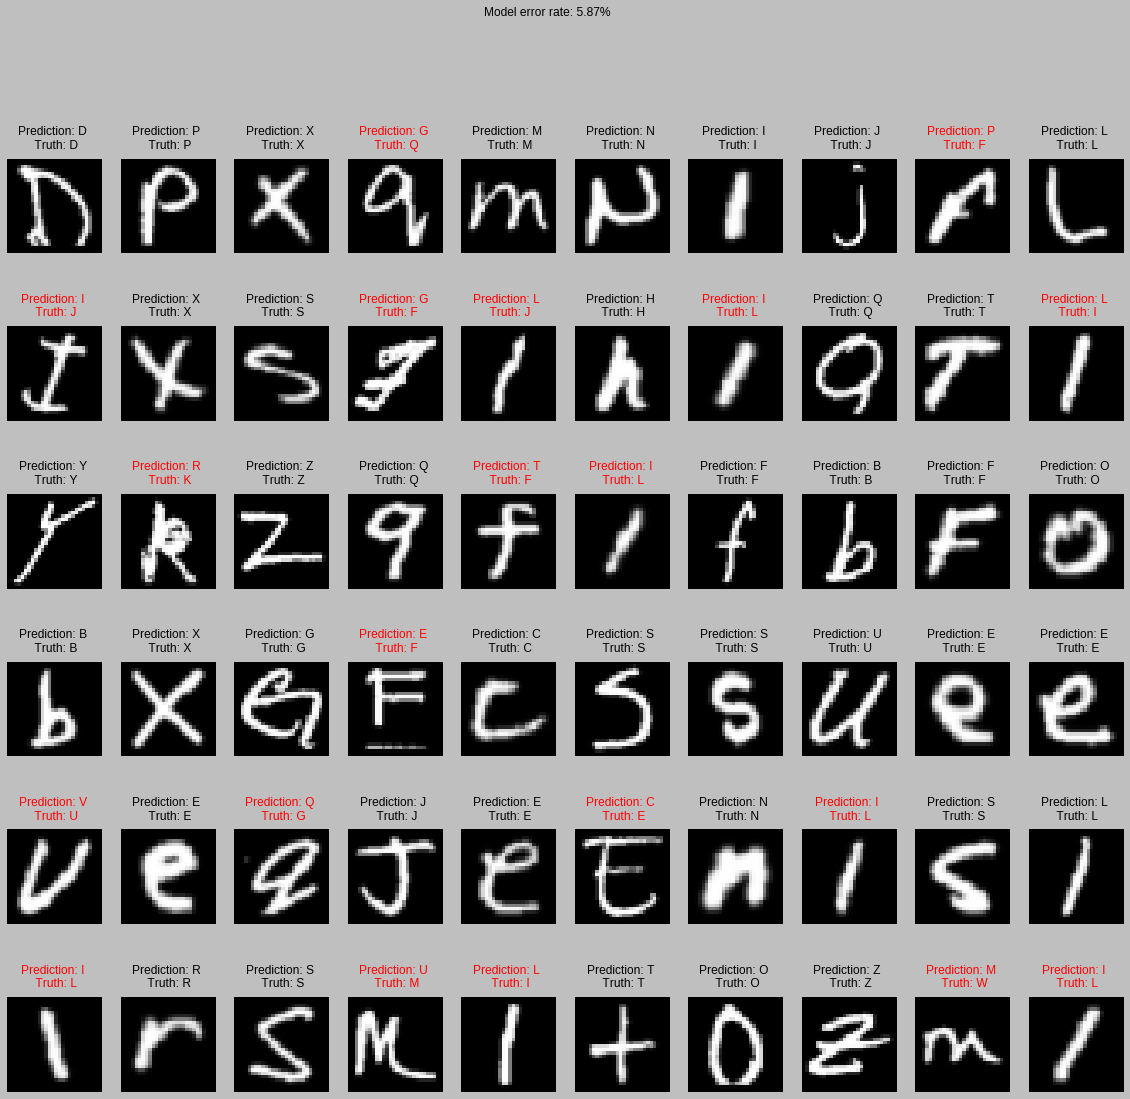

In [8]:
K.clear_session()
model = load_model(path.join('models', 'convolutional_dropout.h5'))
in_layer = model.input
out_layer = layers.Dense(26, activation="softmax", name="letter_output")(model.layers[-2].output)
for layer in model.layers[:-6]:
    print(layer.name)
    layer.trainable = False
letters_model = Model(in_layer, out_layer)
print(letters_model.summary())
opt = optimizers.SGD(lr=0.3)
letters_model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6, verbose=True)
h = letters_model.fit(
    train_img, train_lab, validation_split=0.2, epochs=60,
    batch_size=100, callbacks=[reduce_lr]
    )

plt.plot(h.epoch, h.history['val_acc'], h.history['acc'])
plt.legend(["Validation Accuracy", "Training Accuracy"], loc=4)
K.set_learning_phase(0)
show_test_emnist(letters_model, (test_img, test_lab))